# linear regression using LASSO, RIDGE and ELASTIC NET PN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
data=pd.read_csv("winequality-white.csv")

In [4]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
data.tail()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [53]:
data.shape

(4898, 12)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        4898 non-null   float64
 1   volatileacidity     4898 non-null   float64
 2   citricacid          4898 non-null   float64
 3   residualsugar       4898 non-null   float64
 4   chlorides           4898 non-null   float64
 5   freesulfurdioxide   4898 non-null   float64
 6   totalsulfurdioxide  4898 non-null   float64
 7   density             4898 non-null   float64
 8   pH                  4898 non-null   float64
 9   sulphates           4898 non-null   float64
 10  alcohol             4898 non-null   float64
 11  quality             4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.isna().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [6]:
data.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
data.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


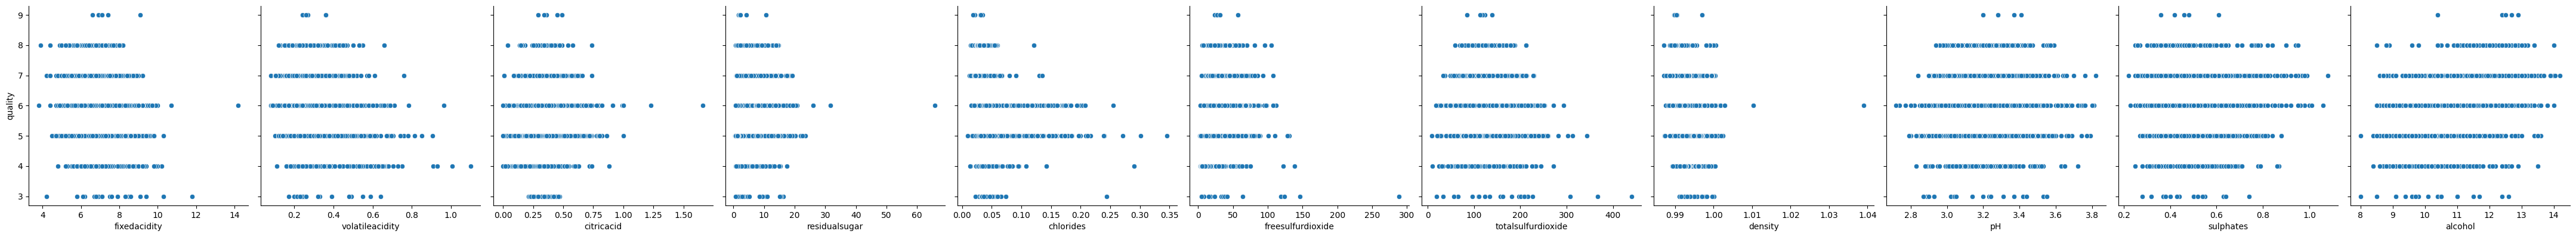

In [8]:
sn.pairplot(data,x_vars=['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density','pH', 'sulphates', 'alcohol'],y_vars=['quality'],size=4,aspect=1,kind="scatter")

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


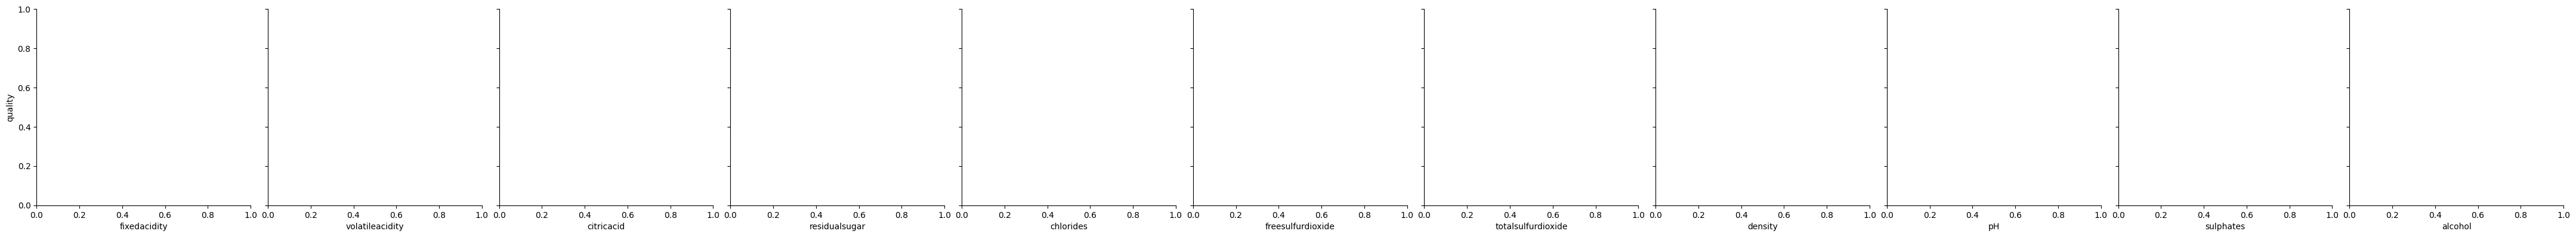

In [59]:
sn.pairplot(data,x_vars=['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density','pH', 'sulphates', 'alcohol'],y_vars=['quality'],size=4,aspect=1,kind="ref")

In [9]:
data.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatileacidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citricacid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residualsugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
freesulfurdioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
totalsulfurdioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot: >

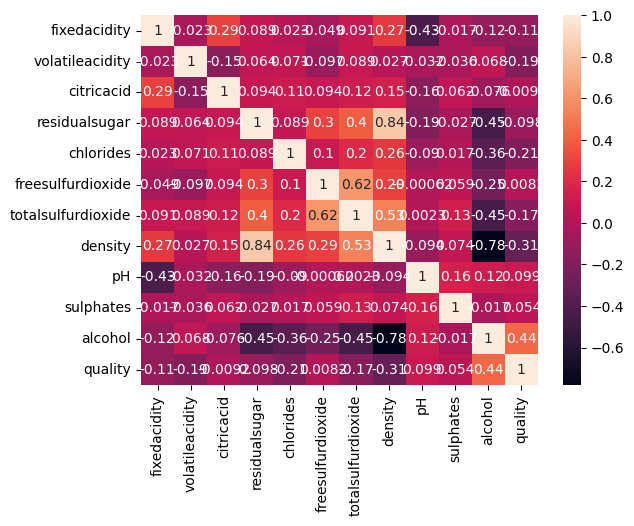

In [61]:
sn.heatmap(data.corr(),annot=True,)

In [10]:
x=data[['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol']]
y=data["quality"]   

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=200)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.intercept_

153.57021251007654

In [15]:
model.coef_

array([ 6.69187661e-02, -1.80112669e+00,  8.41926656e-02,  8.33633239e-02,
       -1.41423944e-01,  3.44759690e-03, -3.35742582e-04, -1.53804059e+02,
        7.04728953e-01,  6.61002532e-01,  1.93044698e-01])

0.2752864806168124

## RIDGE

In [17]:
from sklearn.linear_model import Ridge  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train)

Ridge(alpha=1)

In [18]:
ridgeR.score(x_train, y_train)

0.27300069702549756

In [19]:
y_pred = ridgeR.predict(x_test)
y_pred

array([5.29715328, 5.5340432 , 6.55372608, 6.04039869, 5.09599147,
       6.08342843, 6.13174523, 6.24066121, 5.50295403, 5.58342557,
       5.90178055, 5.62886426, 6.12891241, 5.5918241 , 6.28150094,
       4.97192071, 5.00323578, 6.37697935, 5.5801964 , 5.68705984,
       5.81378726, 5.56364561, 5.52080321, 5.68407312, 6.01294895,
       6.66767326, 5.43719391, 5.3534864 , 5.99561099, 6.14272746,
       4.87029093, 5.27970628, 6.52160905, 6.41531477, 5.60752586,
       6.4981236 , 5.52919273, 5.98870976, 6.28113354, 5.82782251,
       5.42929599, 5.81539169, 5.97113176, 5.9795337 , 6.37877189,
       5.84726708, 5.79937497, 5.92230622, 5.50572894, 5.78344273,
       5.38030766, 6.04551389, 6.10956844, 6.62064015, 5.99151245,
       6.08696862, 5.92641576, 5.36485079, 6.16539868, 5.4488276 ,
       6.03878807, 6.04274927, 5.24031187, 6.46252732, 5.45692781,
       6.69039574, 5.22828963, 6.01662346, 5.59184459, 6.56422513,
       5.19700304, 6.34112321, 5.93875696, 5.72971825, 5.96987

## LASSO

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 100)
lasso.fit(x_train, y_train)

Lasso(alpha=100)

In [21]:
lasso.score(x_test, y_test)

-0.0004100291036308601

In [22]:
y_pred1 = lasso.predict(x_test)

In [23]:
y_pred1

array([5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442573,
       5.87442573, 5.87442573, 5.87442573, 5.87442573, 5.87442

## ELASTICNET

In [24]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha =1000)
e_net.fit(x_train,y_train)

ElasticNet(alpha=1000)

In [25]:
e_net.score(x_test,y_test)

-0.0004100291036308601

In [26]:
y_pred_elastic = e_net.predict(x_test)
y_pred

array([5.29715328, 5.5340432 , 6.55372608, 6.04039869, 5.09599147,
       6.08342843, 6.13174523, 6.24066121, 5.50295403, 5.58342557,
       5.90178055, 5.62886426, 6.12891241, 5.5918241 , 6.28150094,
       4.97192071, 5.00323578, 6.37697935, 5.5801964 , 5.68705984,
       5.81378726, 5.56364561, 5.52080321, 5.68407312, 6.01294895,
       6.66767326, 5.43719391, 5.3534864 , 5.99561099, 6.14272746,
       4.87029093, 5.27970628, 6.52160905, 6.41531477, 5.60752586,
       6.4981236 , 5.52919273, 5.98870976, 6.28113354, 5.82782251,
       5.42929599, 5.81539169, 5.97113176, 5.9795337 , 6.37877189,
       5.84726708, 5.79937497, 5.92230622, 5.50572894, 5.78344273,
       5.38030766, 6.04551389, 6.10956844, 6.62064015, 5.99151245,
       6.08696862, 5.92641576, 5.36485079, 6.16539868, 5.4488276 ,
       6.03878807, 6.04274927, 5.24031187, 6.46252732, 5.45692781,
       6.69039574, 5.22828963, 6.01662346, 5.59184459, 6.56422513,
       5.19700304, 6.34112321, 5.93875696, 5.72971825, 5.96987

In [27]:
import pickle
pickle_out = open("first attempt","wb")
pickle.dump(model, pickle_out)
pickle_out.close()